In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [3]:
public_df.shape

(7426, 59)

In [6]:
public_df.columns

Index(['row_id', 'user_id', 'record_id', 'recordReceived_ISO8601',
       'recordReceived_secondsSinceMidnight1Jan1970UTC', 'surveyNumber',
       'timestamp', 'startTime', 'associatedAlert', 'responseLagSeconds',
       'dailyAlertNumber', 'spendingDay', 'spendingDayOther', 'sleptFor',
       'tiredness', 'connectedColleagues', 'connectedPatients',
       'feelingEmotion', 'generalEmotion', 'specificEmotion', 'otherEmotion',
       'intensity', 'trigger', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 'emotionResponse',
       'emotionDuration', 'emotionResponseHel

In [4]:
public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 59 columns):
row_id                                            7426 non-null int64
user_id                                           7426 non-null object
record_id                                         7426 non-null object
recordReceived_ISO8601                            7426 non-null object
recordReceived_secondsSinceMidnight1Jan1970UTC    7426 non-null int64
surveyNumber                                      7426 non-null int64
timestamp                                         7426 non-null int64
startTime                                         7426 non-null object
associatedAlert                                   6696 non-null object
responseLagSeconds                                6696 non-null float64
dailyAlertNumber                                  6696 non-null float64
spendingDay                                       755 non-null object
spendingDayOther                            

In [5]:
pre_survey = pd.read_csv('data/public-study/EmoTrak PreAssessment_November CLEAN 2017_11.14.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 2: invalid start byte

In [11]:
subset = public_df[['generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 
        'emotionResponse',
       'emotionDuration', 'emotionResponseHelpful']]

In [12]:
subset.head(15)

,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,emotionResponse,emotionDuration,emotionResponseHelpful
0,enjoyment,peaceful,0.50,wellbeing,exercise,0.75,enjoyment,60,NaN
1,fear,anxious,0.25,workStress,workload,0.50,action,60+,helpful
2,anger,frustrated,0.25,socialStress,soChallenge,0.25,withdrawal,30,neutral
3,enjoyment,happy,0.50,socialSupport,timeFamily,0.50,enjoyment,5,NaN
4,enjoyment,happy,0.50,wellbeing,play,0.50,observation,30,NaN
5,anger,frustrated,0.50,socialSupport,timeFamily,1.00,observation,30,veryHelpful
6,enjoyment,joyful,0.75,socialSupport,timeFriends,0.50,enjoyment,60,NaN
7,sadness,discouraged,0.25,workStress,workload,1.00,avoidance,60,unhelpful
8,enjoyment,peaceful,1.00,wellbeing,exercise,0.25,enjoyment,15,NaN
9,enjoyment,excited,0.75,wellbeing,exercise,0.75,enjoyment,30,NaN


In [14]:
subset['emotionResponseHelpful'].isnull().sum()

3431

In [15]:
subset['generalEmotion'].value_counts()

enjoyment    3431
fear         1419
anger        1230
sadness       726
other         620
Name: generalEmotion, dtype: int64

In [16]:
subset['specificEmotion'].value_counts()

peaceful        1320
happy            959
anxious          747
notListed        532
enthusiastic     447
frustrated       386
worried          361
excited          358
joyful           347
irritated        339
annoyed          336
discouraged      292
sad              278
nervous          226
angry            169
lonely           156
afraid            85
ashamed           54
embarrassed       28
embarrased         6
Name: specificEmotion, dtype: int64

In [20]:
total = public_df.isnull().sum().sort_values(ascending = False)
percent = (public_df.isnull().sum()/public_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
spendingDayOther,7310,0.984379
otherEmotion,7286,0.981147
workPositiveInfluence,6820,0.918395
spendingDay,6671,0.898330
connectedPatients,6671,0.898330
connectedColleagues,6671,0.898330
sleptFor,6671,0.898330
emotionResponse,5623,0.757204
emotionResponseHelpful,3431,0.462025
workPilingUp,1187,0.159844


In [21]:
subset.columns

Index(['generalEmotion', 'specificEmotion', 'intensity', 'generalTrigger',
       'specificTrigger', 'bodySensationIntensity', 'emotionResponse',
       'emotionDuration', 'emotionResponseHelpful'],
      dtype='object')

In [22]:
subset.head()

,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,emotionResponse,emotionDuration,emotionResponseHelpful
0,enjoyment,peaceful,0.50,wellbeing,exercise,0.75,enjoyment,60,NaN
1,fear,anxious,0.25,workStress,workload,0.50,action,60+,helpful
2,anger,frustrated,0.25,socialStress,soChallenge,0.25,withdrawal,30,neutral
3,enjoyment,happy,0.50,socialSupport,timeFamily,0.50,enjoyment,5,NaN
4,enjoyment,happy,0.50,wellbeing,play,0.50,observation,30,NaN


IndexError: too many indices for array

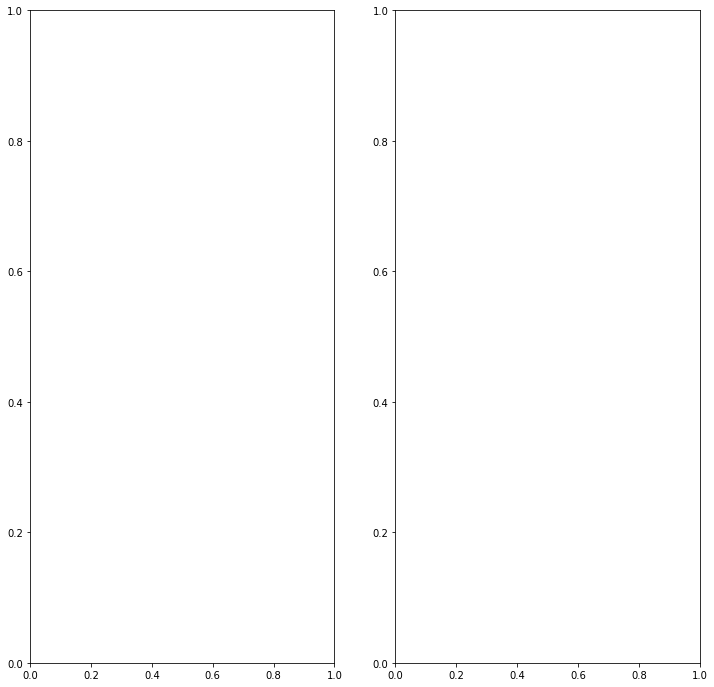

In [27]:
fig, axes = plt.subplots(1,2, figsize=(12,12));
axes[0,0].hist(subset['generalEmotion']);

KeyboardInterrupt: 

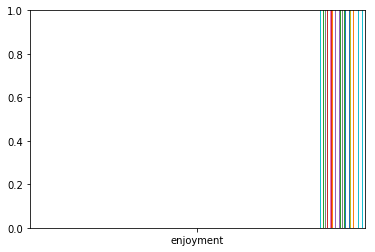

In [28]:
plt.hist(subset['generalEmotion']);

TypeError: 'AxesSubplot' object does not support indexing

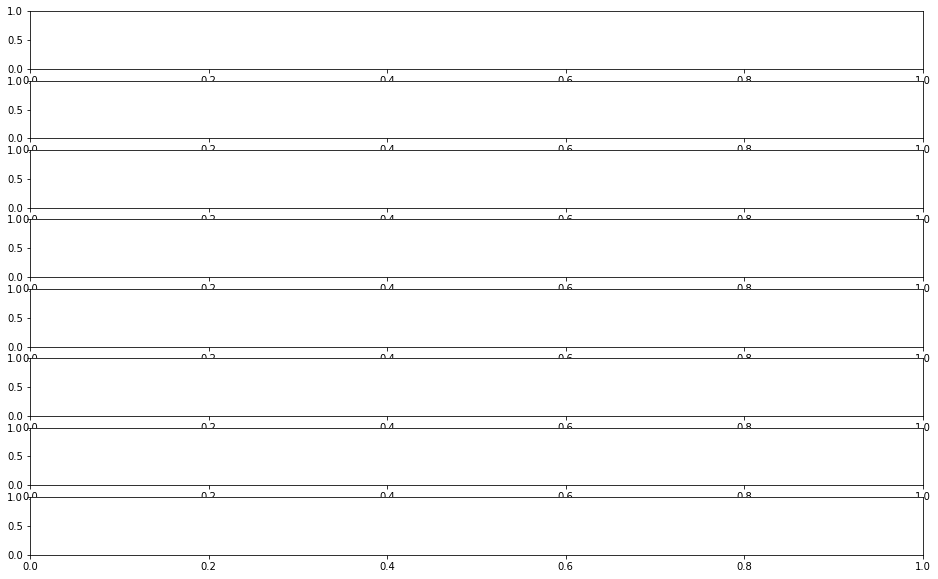

In [33]:
fig, ax = plt.subplots(8,1, figsize=(16,10))
# ax[0][0].hist(subset['generalEmotion'])
# ax[0][1].hist(subset['specificEmotion']);
# ax[1][0].hist(subset['generalTrigger'])
# ax[1][1].hist(subset['specificTrigger'])
# ax[2][0].hist(subset['emotionResponse'])
# ax[2][1].hist(subset['emotionResponseHelpful'])
ax[6][0].plot(subset['intensity'])
ax[7][0].plot(subset['bodySensationIntensity']);
